<a href="https://colab.research.google.com/github/SecondThread/MachineLearningClass/blob/master/HW3/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting Random Data

Clean way to get random data, returned as a numpy array.

In [0]:
import numpy as np;

def get_random_data(w, b, mu, sigma, m):
  #generate m data points, where each point has features x1 and x2, and a label c=0/1
  x1s = np.random.random(m);
  data = [];
  labels = [];
  for i in range(m):
    x_1 = x1s[i];
    c = np.random.randint(0, 2);
    n = np.random.randn()*sigma + mu;
    x_2 = w * x_1 + b + (-1 if c==1 else 1)*n;
    data.append([x_1, x_2]);
    labels.append(c);
  return (np.array(data), np.array(labels));


##Displaying Random Data

Pretty straight forward. I just filter it based on the label and use pyplot with the colors specified in the assignment.

In [0]:
import matplotlib.pyplot as plt;

def display_random_data(data, labels):
  x1s, x2s = data[:, 0], data[:, 1];
  x1s_blue = [x1s[i] for i in range(x1s.shape[0]) if labels[i]==0];
  x2s_blue = [x2s[i] for i in range(x2s.shape[0]) if labels[i]==0];
  x1s_red = [x1s[i] for i in range(x1s.shape[0]) if labels[i]==1];
  x2s_red = [x2s[i] for i in range(x2s.shape[0]) if labels[i]==1];
  plt.scatter(x1s_blue, x2s_blue, c='blue');
  plt.scatter(x1s_red, x2s_red, c='red');
  plt.show();

##Sample Experiments:

Here are a couple different instances with different values for `mu` and `sigma`.

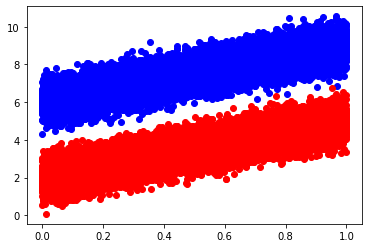

In [132]:
data, labels = get_random_data(3, 4, 2, 0.5, 50000);
display_random_data(data, labels);

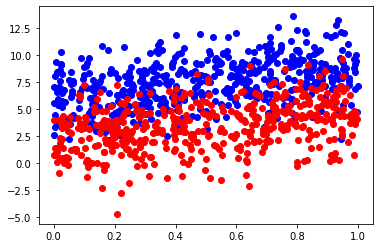

In [133]:
data2, labels2 = get_random_data(3, 4, 2, 2, 1000);
display_random_data(data2, labels2);

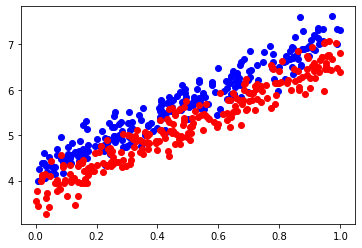

In [134]:
data3, labels3 = get_random_data(3, 4, .25, 0.25, 500);
display_random_data(data3, labels3);


From experimenting with things, it seems that although the second figure have plenty of points for a human to clearly see where the line should be, the learning rate set in keras is small enough that in order for it to accurately fit the data, an obscene number of epochs have to be run with that little data.

To cut down on the number of epochs and speed everything up, I increased the size of the first data set, which I will use in parts 2 and 3.

#Logistic Regression with Keras

Here is a pretty clean implementation of logistic regression with Keras.

I use a single layer since that is really all that is needed because the data is linear.

I also display a scatter plot showing the correlation between the actual labels and the predicted labels, which greatly helped in sanity-checking my model during development.

Epoch 1/10
1250/1250 [==============================] - 1s 1ms/step - loss: 0.4354
Epoch 2/10
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2828
Epoch 3/10
1250/1250 [==============================] - 1s 1ms/step - loss: 0.2068
Epoch 4/10
1250/1250 [==============================] - 1s 1ms/step - loss: 0.1627
Epoch 5/10
1250/1250 [==============================] - 1s 1ms/step - loss: 0.1343
Epoch 6/10
1250/1250 [==============================] - 1s 1ms/step - loss: 0.1145
Epoch 7/10
1250/1250 [==============================] - 1s 1ms/step - loss: 0.1000
Epoch 8/10
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0888
Epoch 9/10
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0800
Epoch 10/10
1250/1250 [==============================] - 1s 1ms/step - loss: 0.0729


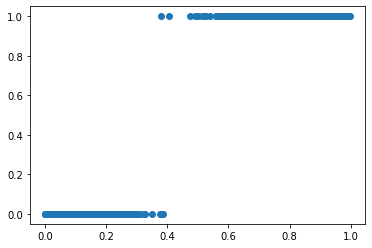

In [135]:
%tensorflow_version 2.x
import tensorflow as tf;

model = tf.keras.models.Sequential();
#since this is linear, all we should need is one dense layer with one output node
model.add(tf.keras.layers.Dense(1, input_shape=(2,), activation='sigmoid'));

# this is binary classification, so binary_crossentropy seems appropriate. MSE also works very well,
# but the assignment said to use binary_crossentropy. After messing with the metrics parameter a bunch,
# I found empirically that I seemed to get the best results leaving it blank at whatever the default is.
model.compile(optimizer='sgd',
              loss='binary_crossentropy');

train_xs = data[:40000];
train_ys = labels[:40000];
test_xs = data[40000:];
test_ys = labels[40000:];

model.fit(train_xs, train_ys, epochs=10);

import matplotlib.pyplot as plt;
predicted_ys=model.predict(train_xs);
plt.scatter(predicted_ys, train_ys);
plt.show();


##Displaying Data with Keras-predicted separation line

The code calculates the line of separation between the two sets of data as predicted by the model Keras trained. I included my math in a comment where it was used. I also display the line that I used to generate the data, which is shown in blue. The orange line is the line found by Keras, which is reasonably close to the ground truth, as you can see.

[array([[ 3.2053516],
       [-1.4352314]], dtype=float32), array([5.982988], dtype=float32)]
3.2053516
-1.4352314
5.982988


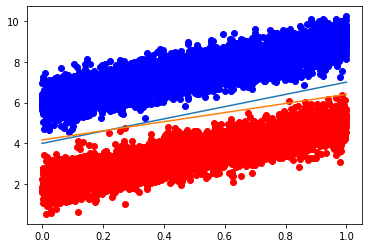

In [24]:
weights=model.get_weights()
print(weights);
print(weights[0][0][0]);
print(weights[0][1][0]);
print(weights[1][0]);

def display_random_data_with_line(data, labels):
  x1s, x2s = data[:, 0], data[:, 1];
  x1s_blue = [x1s[i] for i in range(x1s.shape[0]) if labels[i]==0];
  x2s_blue = [x2s[i] for i in range(x2s.shape[0]) if labels[i]==0];
  x1s_red = [x1s[i] for i in range(x1s.shape[0]) if labels[i]==1];
  x2s_red = [x2s[i] for i in range(x2s.shape[0]) if labels[i]==1];
  plt.scatter(x1s_blue, x2s_blue, c='blue');
  plt.scatter(x1s_red, x2s_red, c='red');
  x = np.linspace(0, 1, 1000)
  plt.plot(x, 3*x+4)
  # Here is the math I worked out to turn this into slope-intercept form
  #ax + by + c = 0
  #by = -ax - c
  # y = -(a/b)x - c/b
  a=weights[0][0][0];
  b=weights[0][1][0];
  c=weights[1][0];
  plt.plot(x, -(a/b)*x-(c/b));
  plt.show();

display_random_data_with_line(test_xs, test_ys);

#Logistic Regression with Numpy

First I wrote a code to display my data again, along with a line that indicated both the true separation and the line predicted by my weights.

In [0]:
def display_random_data_with_line(data, labels, a, b, c):
  x1s, x2s = data[:, 0], data[:, 1];
  x1s_blue = [x1s[i] for i in range(x1s.shape[0]) if labels[i]==0];
  x2s_blue = [x2s[i] for i in range(x2s.shape[0]) if labels[i]==0];
  x1s_red = [x1s[i] for i in range(x1s.shape[0]) if labels[i]==1];
  x2s_red = [x2s[i] for i in range(x2s.shape[0]) if labels[i]==1];
  plt.scatter(x1s_blue, x2s_blue, c='blue');
  plt.scatter(x1s_red, x2s_red, c='red');
  x = np.linspace(0, 1, 1000)
  plt.plot(x, 3*x+4)
  # Here is the math I worked out to turn this into slope-intercept form
  #ax + by + c = 0
  #by = -ax - c
  # y = -(a/b)x - c/b
  plt.plot(x, -(a/b)*x-(c/b));
  plt.show();

Below is my implementation of binary cross-entropy. I also calculate the loss on training data, as well as the accuracy, as described in the assignment. It appears this is occasionally slightly above 1.0 because of floating-point division imprecision.

[0.50516286 0.89716662 0.52539645]
Epoch: 0, test accuracy: 0.9970000000000008 training binary-crossentropy loss: 0.31351602298300796
Epoch: 1, test accuracy: 1.0000000000000007 training binary-crossentropy loss: 0.13192790982891586
Epoch: 2, test accuracy: 1.0000000000000007 training binary-crossentropy loss: 0.08555056745982413
Epoch: 3, test accuracy: 1.0000000000000007 training binary-crossentropy loss: 0.06411569334294515
Epoch: 4, test accuracy: 1.0000000000000007 training binary-crossentropy loss: 0.0517950096314348
Epoch: 5, test accuracy: 1.0000000000000007 training binary-crossentropy loss: 0.043399232130902
Epoch: 6, test accuracy: 1.0000000000000007 training binary-crossentropy loss: 0.037620255298287164
Epoch: 7, test accuracy: 1.0000000000000007 training binary-crossentropy loss: 0.0332944048274341
Epoch: 8, test accuracy: 1.0000000000000007 training binary-crossentropy loss: 0.029893114166274538
Epoch: 9, test accuracy: 1.0000000000000007 training binary-crossentropy los

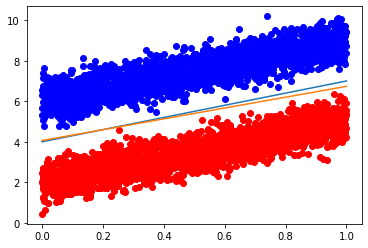

In [94]:
import numpy as np;
import math as math;
n=5000;
data, labels = get_random_data(3, 4, 2, 0.5, n);
weights = np.random.random(3);
print(weights);
# I will use the same format that keras does
# which is [w1, w2, bias]
# append a column of 1s to the data for convenience
data1s = np.array([[data[i][0], data[i][1], 1] for i in range(0, data.shape[0])]);

#split data into training data and test data
training_size = int(round(.8*n));
test_size = n-training_size;

train_xs_1s = data1s[:training_size];
train_ys = labels[:training_size];
test_xs_1s = data1s[training_size:];
test_ys = labels[training_size:];

def sigmoid(z):
  return 1/(1+math.exp(-z));

def eval_at(weights, x_1s):
  z=np.dot(x_1s, weights);
  a=sigmoid(z);
  return a;
  
epochs = 10;
LEARNING_RATE=0.01;

for epoch in range(0, epochs):
  perm=np.random.permutation(training_size);
  shuffled_xs=train_xs_1s[perm];
  shuffled_ys=train_ys[perm];

  training_loss=0;
  for i in range(training_size):
    xs=shuffled_xs[i];
    a = eval_at(xs, weights)
    #the formula derived in the notes winds up being insanely convenient
    gradient=(a-shuffled_ys[i]) * xs;
    weights = weights - LEARNING_RATE * gradient;
    
    #add to the total loss for this epoch
    y = shuffled_ys[i];
    training_loss += (-y*math.log(a) - (1-y)*math.log(1-a))/training_size;
  
  accuracy=0;
  for i in range(test_size):
    prediction=eval_at(weights, test_xs_1s[i]);
    roundedPrediction=int(round(prediction));
    if roundedPrediction == test_ys[i]:
      accuracy+=1/(test_size);
  print('Epoch: ' + str(epoch) + ', test accuracy: ' + str(accuracy) + ' training binary-crossentropy loss: ' + str(training_loss))

print('updated weights: ');
print(weights);
display_random_data_with_line(data, labels, weights[0], weights[1], weights[2])




##Logistic Regression Heatmap

I wasn't able to find any good information on how to create a heatmap. Instead, I built one myself on top of the existing plt.imshow functionality. Two hurtles that I had to overcome were:
 - The y axis is inverted in images compared to cartesian coordinates.
 - The x axis is scaled at 1/10th the scale of the y axis above.

Both of these are reflected in my conversion from a pixel to a cartesian coordinate. This allows the heatmap to match in its bounding-box to the images shown above.

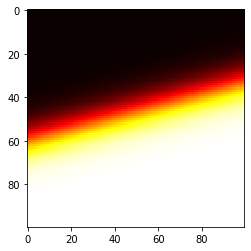

In [124]:
def show_heatmap():
  xs=np.random.random(5000);
  ys=np.random.random(5000)*10;
  zs=[eval_at(weights, [xs[i], ys[i], 1]) for i in range(5000)];
  a=np.random.random((100, 100));
  for x in range(0, 100):
    for y in range(0, 100):
      a[y][x]=eval_at(weights, [x/100, (100-y)/10, 1]);
  plt.imshow(a, cmap='hot', interpolation='nearest');

show_heatmap();